Trying machine learning classification on Iris dataset
ref: https://www.youtube.com/watch?v=f3ZJbTyz_pU
ref: https://www.youtube.com/redirect?event=video_description&redir_token=QUFFLUhqbnlpQVZ3VEtzeEdwaGI4M3FkYmNXZk5FX25QZ3xBQ3Jtc0tsV3J6ck9fN3M3NW9NOExkRDItRjdrdFJDbGMwbzBLbHMxSzdnWXBEWWtqSlBZY3dpTUd1RkpOREFKLU5PMXRodGxhSl9PMlh0U3VIRXVuMUcxeE1ZTU9BX2hEU2djTk9ibk5pV3ZUX2R0aVNvWEZDYw&q=https%3A%2F%2Fgithub.com%2Feduai-repo%2FML-Demo&v=f3ZJbTyz_pU

1. Prepare X and Y
2. Import Machine Learning Algorythm
3. Train ML Model - fit
4. Predict when new imput given
5. model-score -> measure accuracy of the model

1. Prepare X and Y
In machine learning, when we talk about preparing X and Y, (organizing and formatting the input data (X) and the output or target data (Y).)<br>
X represents the input features or independent variables, which are the data points. (For example, building a model to predict housing prices, X could include features like the number of bedrooms, square footage, location, etc. Each row in the X matrix corresponds to a specific data point.)<br>
Y represents the output or target variable, which is what we want the model to predict. In the housing price prediction example, Y would be the actual prices of the houses corresponding to the input features in X. <br>
**Y can be a continuous value (regression) or discrete categories (classification).**

The process of preparing X and Y involves several steps, such as:
- Data collection: Gathering the required data for your machine learning task.
- Data cleaning: Removing or handling missing data, dealing with outliers, and ensuring the data is in a suitable format.
- Feature engineering: Selecting relevant features, transforming or scaling the data if necessary, and creating new features that might be informative for the model.
- Splitting into X and Y: Separating the input features (X) and the corresponding output/target variable (Y).
- Train-test split: Dividing the dataset into a training set (used to train the model) and a test set (used to evaluate the trained model's performance).
- Data normalization/standardization: Scaling the numerical features to a common range to prevent certain features from dominating the learning process.
- One-hot encoding or label encoding: Converting categorical variables into a numerical representation that can be understood by the machine learning algorithms.<br>
*These steps may vary depending on the specific machine learning task, the type of data, and the algorithms you're using. Properly preparing X and Y is crucial for the model to learn effectively and produce accurate predictions or classifications.*

In [126]:
#import modules

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='white', color_codes=True)

In [127]:
#import data

iris= pd.read_csv("./Datasets/IRIS.csv")
iris.head()

,ID,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [128]:
# check if data not biassed (it is not, there are equal number of datapoints per species)
iris["Species"].value_counts()


setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

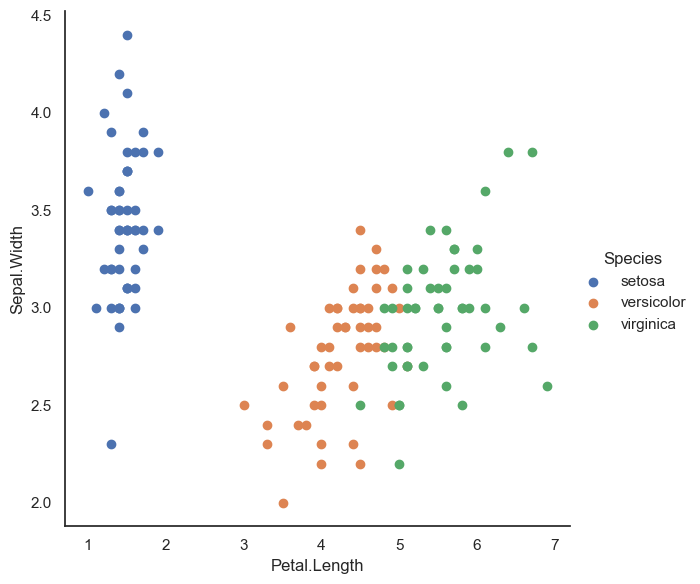

In [129]:
# visualise data
sns.FacetGrid(iris, hue="Species", height=6).map(plt.scatter, "Petal.Length", "Sepal.Width" ).add_legend()

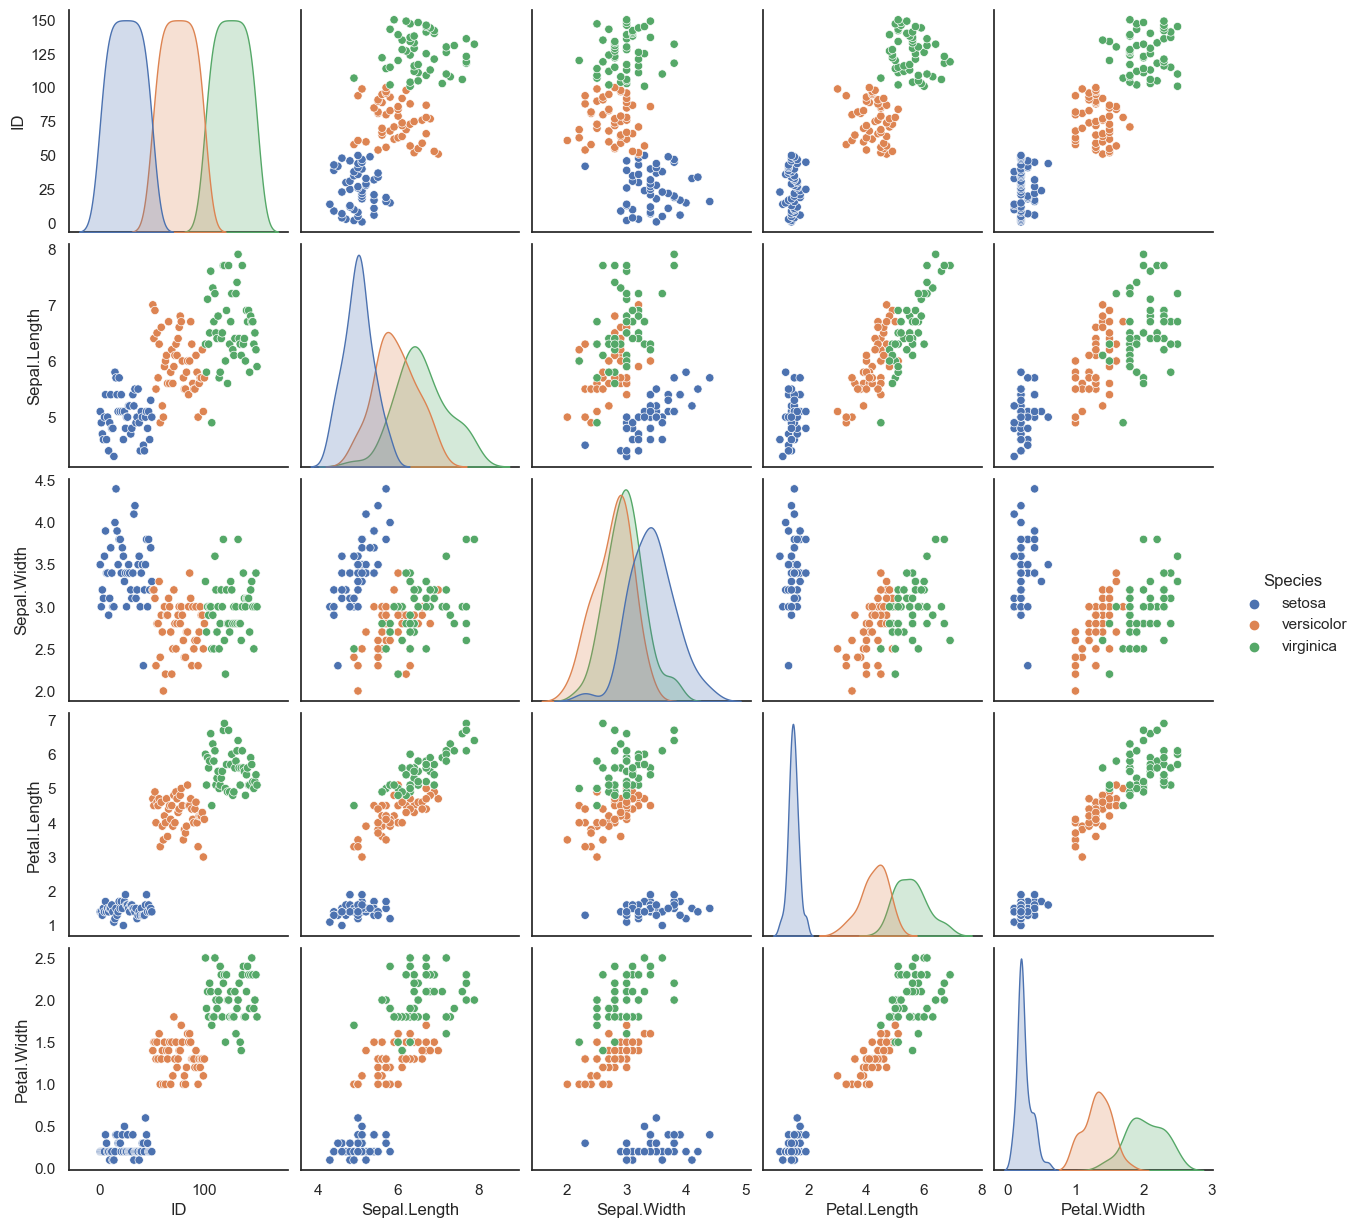

In [130]:
#visualise data better
sns.pairplot(iris, hue="Species")

In [131]:
#### Mapping
#Converting categorical variables (values in "Species" in this case) into numbers
# replacing species names with numbers
flower_mapping = {'setosa':0,'versicolor':1,'virginica':2} # set what is replacing what
iris["Species"] = iris["Species"].map(flower_mapping) # rewrite iris dataframe with the new values
iris["Species"]

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [132]:
#Preparing inputs (X) and outputs(Y)
X=iris[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']].values # these are the datapoints
y=iris[['Species']].values # these are the classes for classification

### Logistic Regression

In [133]:
# importing ML model

from sklearn.linear_model import LogisticRegression

#initialize ML model
model = LogisticRegression()

# train ML model (ML will try to draw the best division line between species data "tell apart data")
model.fit(X,y) # function is used in machine learning to train a model using the input features X and the corresponding target or output values Y. 
               #    This function is typically used with supervised learning algorithms, where you have a labeled dataset with input-output pairs.
               # During the training process, the model iteratively adjusts its internal parameters to minimize the difference between the predicted outputs and the true outputs in Y. 
               #    The number of iterations or epochs determines how many times the model goes through the entire dataset during training.


LogisticRegression()

### Check Accuracy

In [134]:
# check accuracy - single score
model.score(X,y) # The score provides an indication of how well the model fits the given data.
                 # It's important to note that the model.score(X, Y) function evaluates the model's performance on the same data that was used for training. 
                 # This score is not a reliable measure of how well the model will generalize to unseen data. To get a more accurate assessment of model performance, 
                 #  it is recommended to use cross-validation or evaluate the model on a separate test dataset.


0.9733333333333334

In [135]:
# check accuracy - detailed
from sklearn import metrics
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



#### Make predictions

In [136]:
# This outputs values for y (Species 0,1,2) based on X values
expected = y
predicted = model.predict(X)
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

### Check accuracy of results

In [137]:
# cofusion matrix
print(metrics.confusion_matrix(expected, predicted))
#Results:
# [[50  0  0] - 100% accurate - setosa
# [ 0 47  3] - 3 misclassified - versicolor
# [ 0  1 49]] - 1 misclassified - virginica

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


In [138]:
# add predicted column to iris dataframe check discrepancies
iris['Predicted']=predicted
iris.head()


,ID,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Predicted
0,1,5.1,3.5,1.4,0.2,0,0
1,2,4.9,3.0,1.4,0.2,0,0
2,3,4.7,3.2,1.3,0.2,0,0
3,4,4.6,3.1,1.5,0.2,0,0
4,5,5.0,3.6,1.4,0.2,0,0


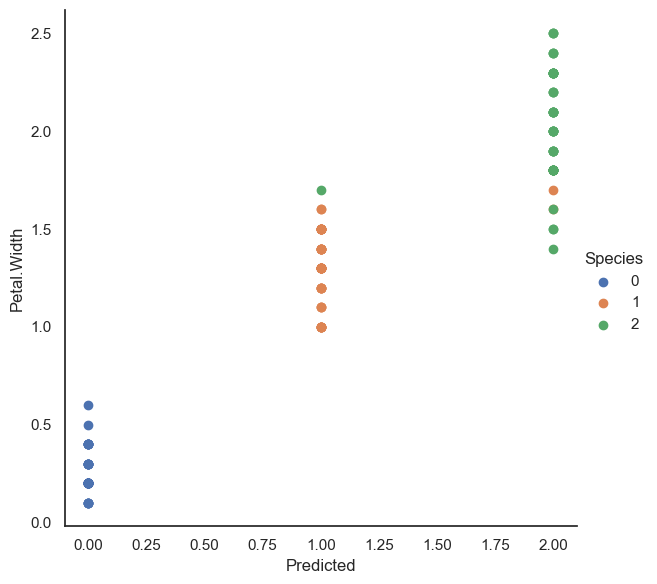

In [139]:
# visualise data and check if Prediction was wrong. (found one misclassification)
sns.FacetGrid(iris, hue="Species", height=6).map(plt.scatter, "Predicted", "Petal.Width" ).add_legend()

# classify new sample data from csv

In [140]:
# read in sample
sample= pd.read_csv("./Datasets/samples.csv")
sample.head()

,ID,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,22.0,5.1,3.7,1.5,0.4,setosa
1,66.0,6.7,3.1,4.4,1.4,versicolor
2,126.0,7.2,3.2,6.0,1.8,virginica
3,127.0,6.2,2.8,4.8,1.8,virginica
4,37.0,5.5,3.5,1.3,0.2,setosa


In [141]:
# get sample ML data as Z
Z=sample[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']].values # these are the datapoints

#Run prediction with pre-trained ML modul
expected = y
predictedClass = model.predict(Z)
predictedClass

sample['PredictedClass']=predictedClass

#name species
species_mapping = {0:'setosa',1:'versicolor',2:'virginica'} # set what is replacing what
sample["PredictedSpecies"] = sample["PredictedClass"].map(species_mapping) # rewrite iris dataframe with the new values
sample.to_csv("classified.csv",index=False)